In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [2]:
##Importation of excel output##

source_table1 = r"c:Growth_curves_Sc-Ca_07_07_2022.xlsx"
source_df = pd.read_excel(source_table1, header=1, index_col=0,)
source_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,163821s,164721s,165621s,166521s,167421s,168321s,169222s,170122s,171022s,171922s
A1,0.12550,0.12662,0.12673,0.12682,0.12660,0.12670,0.12670,0.12708,0.12720,0.12713,...,0.13633,0.13643,0.13653,0.13627,0.13585,0.13620,0.13578,0.13583,0.13598,0.13653
B1,0.12905,0.12990,0.12940,0.12912,0.12920,0.12950,0.12883,0.12925,0.12900,0.12900,...,0.13955,0.13915,0.13935,0.13990,0.14030,0.13982,0.13947,0.13998,0.14003,0.14000
C1,0.12840,0.12872,0.12828,0.12815,0.12792,0.12830,0.12830,0.12853,0.12850,0.12843,...,0.13885,0.13963,0.13917,0.14003,0.13990,0.14005,0.13947,0.13930,0.14008,0.13960
D1,0.14338,0.14368,0.14295,0.14333,0.14238,0.14240,0.14190,0.14202,0.14248,0.14208,...,0.14315,0.14377,0.14358,0.14410,0.14478,0.14410,0.14372,0.14395,0.14463,0.14397
E1,0.12760,0.12880,0.12987,0.12943,0.13020,0.13137,0.13060,0.13122,0.13143,0.13223,...,0.14178,0.14103,0.14168,0.14088,0.14188,0.14205,0.14158,0.14160,0.14163,0.14127


In [3]:
##Conversion of timepoints (s) -> (h)##

rename_dict = {}

for col_name in source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
source_df.rename(columns = rename_dict, inplace=True)

source_df.head()


,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,45.505833,45.755833,46.005833,46.255833,46.505833,46.755833,47.006111,47.256111,47.506111,47.756111
A1,0.12550,0.12662,0.12673,0.12682,0.12660,0.12670,0.12670,0.12708,0.12720,0.12713,...,0.13633,0.13643,0.13653,0.13627,0.13585,0.13620,0.13578,0.13583,0.13598,0.13653
B1,0.12905,0.12990,0.12940,0.12912,0.12920,0.12950,0.12883,0.12925,0.12900,0.12900,...,0.13955,0.13915,0.13935,0.13990,0.14030,0.13982,0.13947,0.13998,0.14003,0.14000
C1,0.12840,0.12872,0.12828,0.12815,0.12792,0.12830,0.12830,0.12853,0.12850,0.12843,...,0.13885,0.13963,0.13917,0.14003,0.13990,0.14005,0.13947,0.13930,0.14008,0.13960
D1,0.14338,0.14368,0.14295,0.14333,0.14238,0.14240,0.14190,0.14202,0.14248,0.14208,...,0.14315,0.14377,0.14358,0.14410,0.14478,0.14410,0.14372,0.14395,0.14463,0.14397
E1,0.12760,0.12880,0.12987,0.12943,0.13020,0.13137,0.13060,0.13122,0.13143,0.13223,...,0.14178,0.14103,0.14168,0.14088,0.14188,0.14205,0.14158,0.14160,0.14163,0.14127


In [4]:
##Turn the dataframe##

source_df=source_df.T
source_df

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
0.000000,0.12550,0.12905,0.12840,0.14338,0.12760,0.13495,0.13588,0.13975,0.12803,0.13742,...,0.14948,0.14038,0.12562,0.12835,0.12930,0.13335,0.12900,0.13095,0.13485,0.13148
0.250000,0.12662,0.12990,0.12872,0.14368,0.12880,0.13628,0.13738,0.14243,0.12870,0.13735,...,0.15020,0.14160,0.12782,0.13085,0.12965,0.13362,0.12940,0.13178,0.13598,0.13412
0.500000,0.12673,0.12940,0.12828,0.14295,0.12987,0.13688,0.13792,0.14220,0.12860,0.13677,...,0.15095,0.14065,0.12798,0.13068,0.12953,0.13295,0.12928,0.13100,0.13567,0.13455
0.750000,0.12682,0.12912,0.12815,0.14333,0.12943,0.13688,0.13805,0.14565,0.12868,0.13665,...,0.14858,0.14145,0.12753,0.13030,0.12945,0.13187,0.12930,0.13153,0.13565,0.13487
1.000000,0.12660,0.12920,0.12792,0.14238,0.13020,0.13650,0.13800,0.14510,0.12850,0.13695,...,0.14793,0.14158,0.12757,0.13053,0.12945,0.13300,0.12930,0.13087,0.13533,0.13595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.755833,0.13620,0.13982,0.14005,0.14410,0.14205,0.14938,0.15080,0.15027,0.13505,0.23098,...,0.14588,0.14588,0.14025,0.14058,0.14100,0.14247,0.14155,0.14040,0.14570,0.13825
47.006111,0.13578,0.13947,0.13947,0.14372,0.14158,0.14843,0.14952,0.14927,0.13478,0.23115,...,0.14472,0.14625,0.14148,0.14017,0.14000,0.14225,0.14150,0.13973,0.14570,0.13885
47.256111,0.13583,0.13998,0.13930,0.14395,0.14160,0.14840,0.15002,0.14948,0.13548,0.23187,...,0.14525,0.14598,0.14080,0.14158,0.14105,0.14185,0.14133,0.14105,0.14535,0.13745
47.506111,0.13598,0.14003,0.14008,0.14463,0.14163,0.14923,0.15055,0.15048,0.13553,0.23188,...,0.14593,0.14672,0.14063,0.14080,0.14047,0.14297,0.14185,0.14108,0.14663,0.13892


In [5]:
##Importation of a plate design from excel##

dict_of_dicts = {}
source_table = r"c:design_plate_sc-ca_2022-07-07.xlsx"

plate_df = pd.read_excel(source_table, header=0, index_col=0)
print(plate_df)

for index, row in plate_df.iterrows():
    well_dict = {}
    for col in plate_df.columns:
        well_dict[col] = plate_df.loc[index, col]
    dict_of_dicts[index] = well_dict
#dict_of_dicts

     row  column            strain                Erg11 from  \
well                                                           
A1     A       1             blanc                     blanc   
B1     B       1             blanc                     blanc   
C1     C       1             blanc                     blanc   
D1     D       1             blanc                     blanc   
E1     E       1             blanc                     blanc   
...   ..     ...               ...                       ...   
C6     C       6  BY4741-ERG11-dox  Saccharomyces cerevisiae   
C7     C       7  BY4741-ERG11-dox  Saccharomyces cerevisiae   
C8     C       8  BY4741-ERG11-dox  Saccharomyces cerevisiae   
C9     C       9  BY4741-ERG11-dox  Saccharomyces cerevisiae   
C10    C      10  BY4741-ERG11-dox  Saccharomyces cerevisiae   

          plasmidlongname      Plasmid variant FluconazoleConc  
well                                                            
A1                  blanc        blan

In [6]:
##Dataframe anotation for the imported plate design##

timepoint_list = list(source_df.index)
index_count = 0
dict_for_df = {}

for well, row in plate_df.iterrows():
    for time in timepoint_list:
        index_dict = {}
        
        index_dict['time'] = time
        index_dict['well'] = well
        
        for col in plate_df.columns:
            index_dict[col] = dict_of_dicts[well][col]
            
        index_dict['OD'] = float(source_df.loc[time][well])
        dict_for_df[index_count] = index_dict
        index_count += 1

In [7]:
##Creation of a dataframe from the dictionnary##
long_form_df = pd.DataFrame.from_dict(dict_for_df, orient='index')
long_form_df

,time,well,row,column,strain,Erg11 from,plasmidlongname,Plasmid,variant,FluconazoleConc,OD
0,0.000000,A1,A,1,blanc,blanc,blanc,blanc,blanc,blanc,0.12550
1,0.250000,A1,A,1,blanc,blanc,blanc,blanc,blanc,blanc,0.12662
2,0.500000,A1,A,1,blanc,blanc,blanc,blanc,blanc,blanc,0.12673
3,0.750000,A1,A,1,blanc,blanc,blanc,blanc,blanc,blanc,0.12682
4,1.000000,A1,A,1,blanc,blanc,blanc,blanc,blanc,blanc,0.12660
...,...,...,...,...,...,...,...,...,...,...,...
18427,46.755833,C10,C,10,BY4741-ERG11-dox,Saccharomyces cerevisiae,pRS31-N-Sc-ERG11_WT,Sc-ERG11_WT,WT,33.66,0.77290
18428,47.006111,C10,C,10,BY4741-ERG11-dox,Saccharomyces cerevisiae,pRS31-N-Sc-ERG11_WT,Sc-ERG11_WT,WT,33.66,0.77285
18429,47.256111,C10,C,10,BY4741-ERG11-dox,Saccharomyces cerevisiae,pRS31-N-Sc-ERG11_WT,Sc-ERG11_WT,WT,33.66,0.77585
18430,47.506111,C10,C,10,BY4741-ERG11-dox,Saccharomyces cerevisiae,pRS31-N-Sc-ERG11_WT,Sc-ERG11_WT,WT,33.66,0.77432


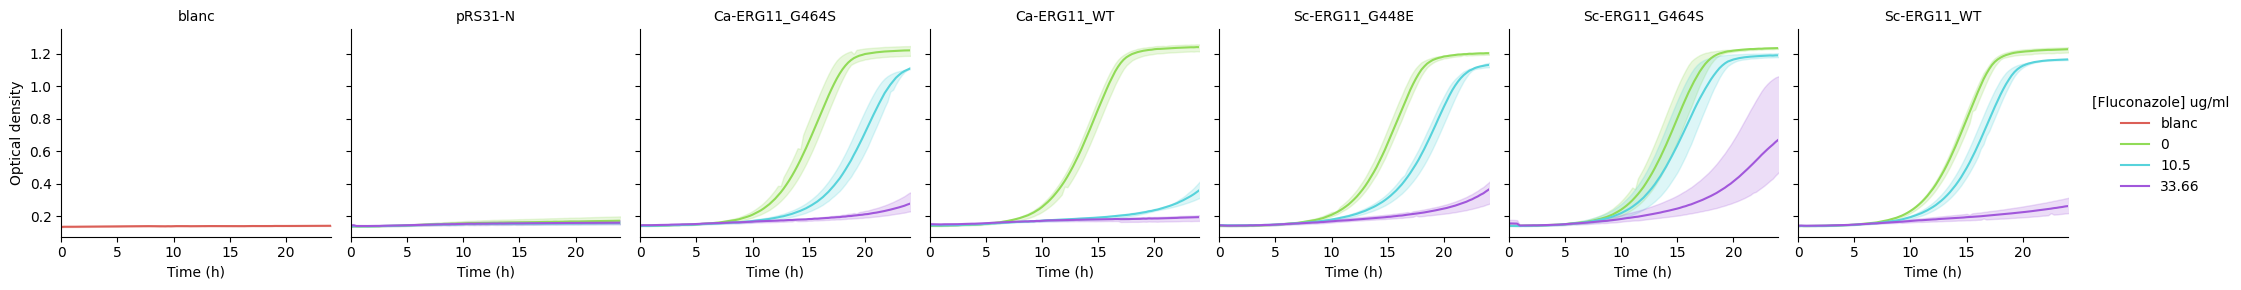

In [8]:
grid = sns.FacetGrid(data=long_form_df, col='Plasmid', hue='FluconazoleConc', palette='hls')
grid.map(sns.lineplot, 'time', 'OD')
grid.set_titles(col_template='{col_name}', row_template='{row_name}',fontsize =2)
grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = "[Fluconazole] ug/ml")

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 24))

plt.savefig(r"c:gc_flz_sc-ca_2.png", format='png', dpi=300, transparent=True)

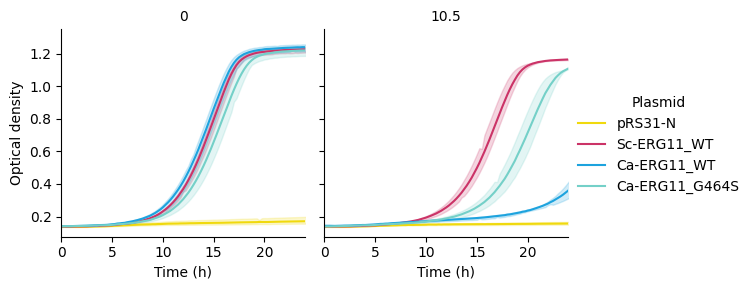

In [9]:


custom_palette = sns.blend_palette(["#F0D90D","#CB3367","#1DA3DE","#74D0C8"], n_colors=4)

grid = sns.FacetGrid(data=long_form_df, col='FluconazoleConc', col_order=[0, 10.5], hue='Plasmid', hue_order=["pRS31-N","Sc-ERG11_WT", "Ca-ERG11_WT", "Ca-ERG11_G464S"], palette=custom_palette)
grid.map(sns.lineplot, 'time', 'OD')
grid.set_titles(col_template='{col_name}', row_template='{row_name}', fontsize=2)

grid.set(xlabel="Time (h)", ylabel="Optical density", xlim=(0, 24))

grid.set_axis_labels('Time (h)', 'Optical density', fontsize=10)
grid.add_legend(title="Plasmid")

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('gc_FLZ_Sc_Ca_DOX.svg', format='svg', dpi=300)
plt.savefig(r"c:gc_flz_memoire.png", format='png', dpi=300, transparent=True)

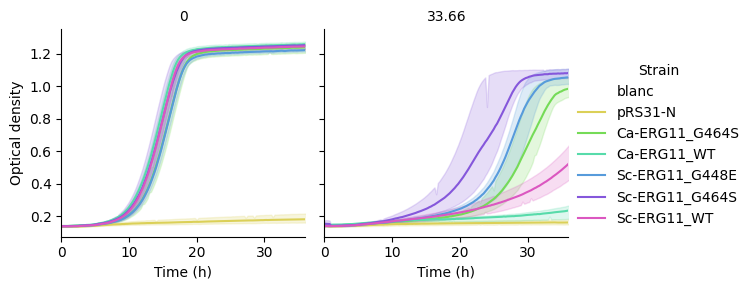

In [10]:
grid = sns.FacetGrid(data=long_form_df, col='FluconazoleConc',  col_order =[0,33.66], hue='Plasmid', palette='hls')
grid.map(sns.lineplot, 'time', 'OD')
grid.set_titles(col_template='{col_name}', row_template='{row_name}',fontsize =2)

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 36))

grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = "Strain")

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 36))

plt.savefig(r"c:gc_flz_sc-ca_36h.png", format='png', dpi=300, transparent=True)

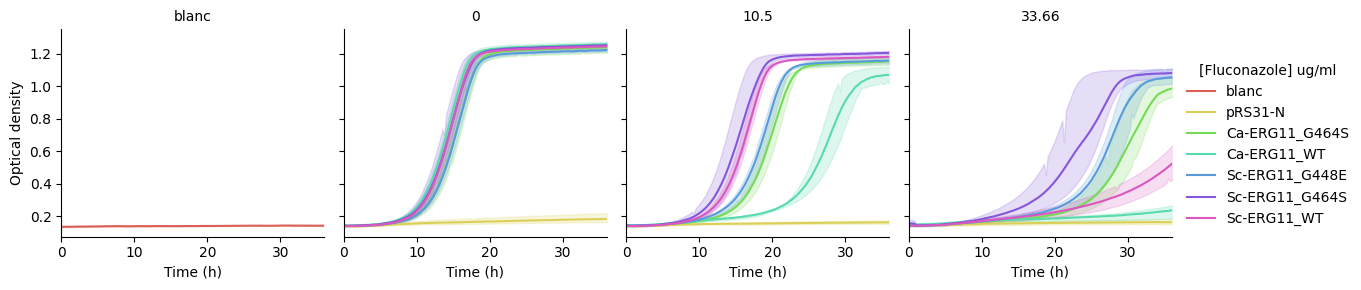

In [11]:
grid = sns.FacetGrid(data=long_form_df, col='FluconazoleConc', hue='Plasmid', palette='hls')
grid.map(sns.lineplot, 'time', 'OD')
grid.set_titles(col_template='{col_name}', row_template='{row_name}',fontsize =2)

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 36))

grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = "[Fluconazole] ug/ml")

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 36))

plt.savefig(r"c:gc_flz_sc-ca_36h.png", format='png', dpi=300, transparent=True)

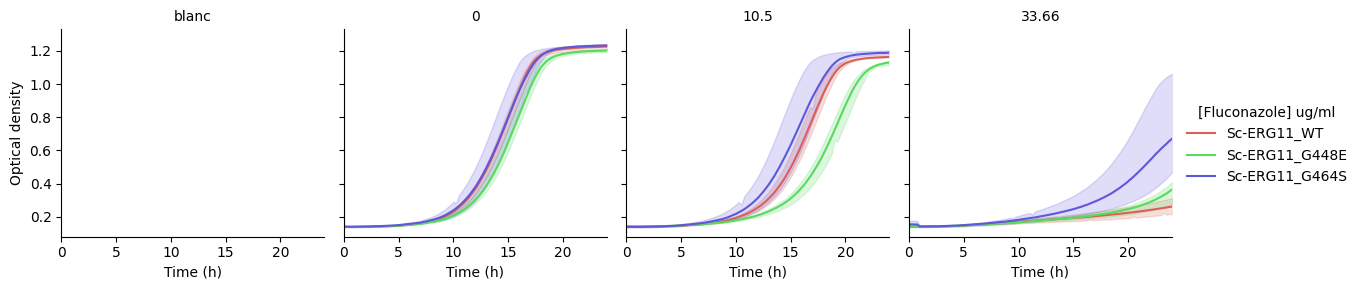

In [12]:
grid = sns.FacetGrid(data=long_form_df, col='FluconazoleConc', hue='Plasmid', palette='hls',hue_order=["Sc-ERG11_WT","Sc-ERG11_G448E","Sc-ERG11_G464S"])
grid.map(sns.lineplot, 'time', 'OD')
grid.set_titles(col_template='{col_name}', row_template='{row_name}',fontsize =2)

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 24))

grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = "[Fluconazole] ug/ml")

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 24))

plt.savefig(r"c:gc_flz_sc_24h.png", format='png', dpi=300, transparent=True)

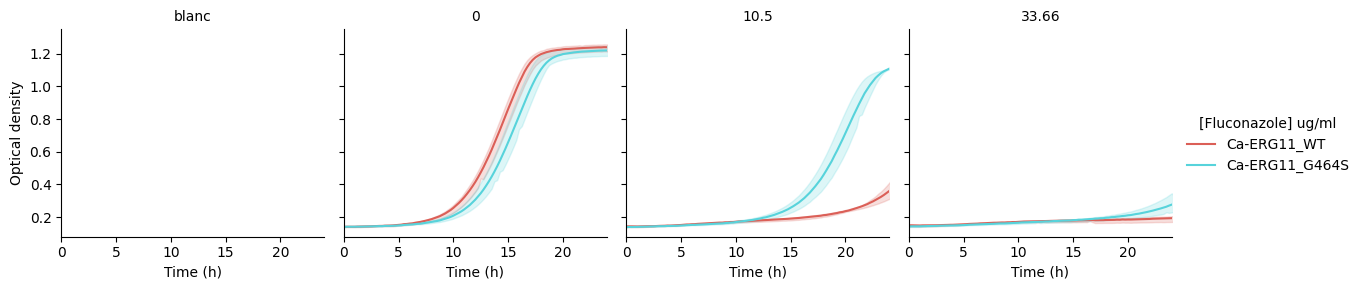

In [13]:
grid = sns.FacetGrid(data=long_form_df, col='FluconazoleConc', hue='Plasmid', palette='hls',hue_order=["Ca-ERG11_WT","Ca-ERG11_G464S"])
grid.map(sns.lineplot, 'time', 'OD')
grid.set_titles(col_template='{col_name}', row_template='{row_name}',fontsize =2)

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 24))

grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = "[Fluconazole] ug/ml")

grid.set( xlabel = "Time (h)", ylabel = "Optical density",xlim=(0, 24))

plt.savefig(r"c:gc_flz_ca_24h.png", format='png', dpi=300, transparent=True)